In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/SCVI/Ipoll/ipoll_encoded_dataset_with_SCVI.csv')

<ipython-input-11-6fa05c5ffc29>:1: DtypeWarning: Columns (57,108,109,110,111) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/SCVI/Ipoll/ipoll_encoded_dataset_with_SCVI.csv')


In [ ]:
df.head()

,caseid,weight_a,panel,qual,q1,q2a,q2b,q2c,q2d,q2e,...,E1_factor,E2_factor,P1_factor,P2_factor,IVI,Frequency,Consequence,Realism,ASI,SCVI
0,52,2.58114653,AMERISPEAK,Qualified Complete,Daily,Several times a month,Daily,Daily,Several times a week,Daily,...,1.923077,NaN,4.6,2.50,2.714560,0,0.0,0.0,0.00,1.357280
1,56,1.274268862,AMERISPEAK,Qualified Complete,Daily,Once a month,Several times a month,Daily,Daily,Daily,...,2.266667,NaN,2.8,2.25,2.688492,2,5.0,5.0,3.96,3.324246
2,61,1.406603673,AMERISPEAK,Qualified Complete,Daily,Less than once a month,Several times a month,Daily,Daily,Less than once a month,...,2.272727,0.0,3.6,1.25,1.943043,3,5.0,5.0,4.29,3.116521
3,63,.590772313,AMERISPEAK,Qualified Complete,Daily,Less than once a month,Less than once a month,Several times a month,Daily,Never,...,2.000000,NaN,4.2,0.75,2.178571,1,5.0,5.0,3.63,2.904286
4,64,1.556107345,AMERISPEAK,Qualified Complete,Daily,Once a month,Daily,Daily,Daily,Daily,...,2.777778,0.0,5.0,2.50,2.393764,1,0.0,0.0,0.33,1.361882


In [ ]:
# Reverse the Realism column values
def reverse_realism(df, realism_column="Realism"):
    df["Realism"] = 5 - df[realism_column]
    return df

# Apply the function to your DataFrame
df = reverse_realism(df, realism_column="Realism")

# Verify the transformation
print("Original Realism and Reversed Realism:")



Original Realism and Reversed Realism:


In [ ]:
# Reverse the Realism column values
def reverse_realism(df, realism_column="A2_factor"):
    df["A2_factor"] = 5 - df[realism_column]
    return df

# Apply the function to your DataFrame
df = reverse_realism(df, realism_column="A2_factor")

# Verify the transformation
print("Original Realism and Reversed Realism:")

Original Realism and Reversed Realism:


In [ ]:
# Reverse the Realism column values
def reverse_realism(df, realism_column="A1_factor"):
    df["A1_factor"] = 5 - df[realism_column]
    return df

# Apply the function to your DataFrame
df = reverse_realism(df, realism_column="A1_factor")

# Verify the transformation
print("Original Realism and Reversed Realism:")

Original Realism and Reversed Realism:


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

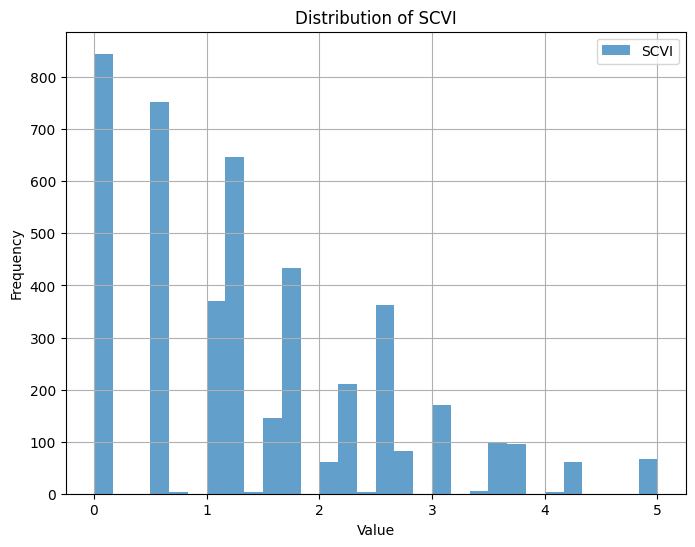

In [ ]:
# Plot histogram for SCVI
plt.figure(figsize=(8, 6))
plt.hist(df['A2_factor'], bins=30, alpha=0.7, label="SCVI")
plt.title("Distribution of SCVI")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

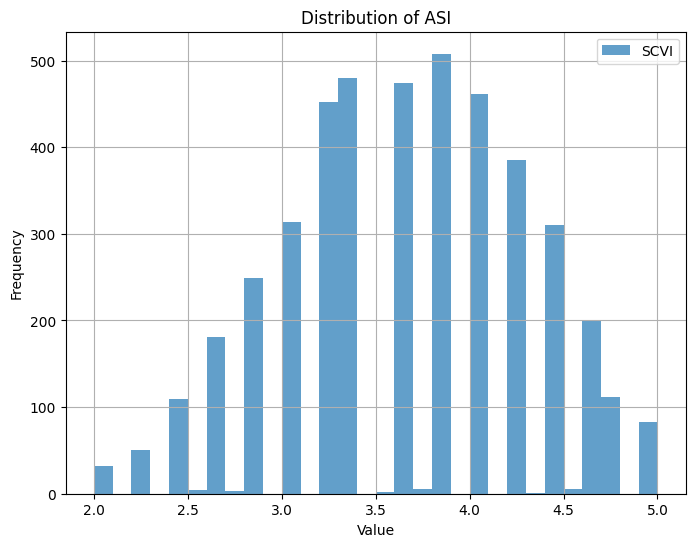

In [ ]:
# Plot histogram for SCVI
plt.figure(figsize=(8, 6))
plt.hist(df['A1_factor'], bins=30, alpha=0.7, label="SCVI")
plt.title("Distribution of ASI")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

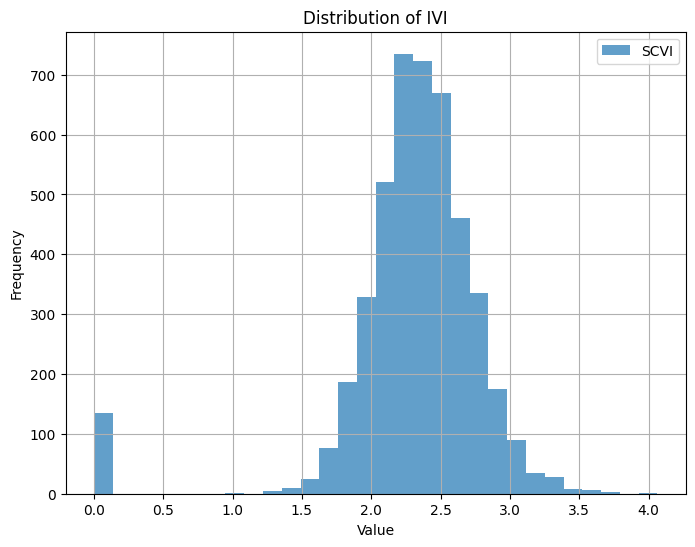

In [ ]:
# Plot histogram for SCVI
plt.figure(figsize=(8, 6))
plt.hist(df['IVI'], bins=30, alpha=0.7, label="SCVI")
plt.title("Distribution of IVI")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Fill missing values with zero for the IVI columns
ivi_columns = ["A1_factor", "A2_factor", "B1_factor", "E1_factor", "E2_factor", "P1_factor", "P2_factor"]
df[ivi_columns] = df[ivi_columns].fillna(0)


In [ ]:
 #Fill missing values in the IVI columns with the mean of each column
df[ivi_columns] = df[ivi_columns].fillna(df[ivi_columns].mean())



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1_factor  100 non-null    float64
 1   A2_factor  100 non-null    float64
 2   B1_factor  100 non-null    float64
 3   P1_factor  100 non-null    float64
 4   P2_factor  100 non-null    float64
 5   E1_factor  100 non-null    float64
 6   E2_factor  100 non-null    float64
 7   ASI        100 non-null    float64
dtypes: float64(8)
memory usage: 6.4 KB


In [ ]:
df = df.dropna(subset=["A1_factor", "A2_factor", "B1_factor", "E1_factor", "E2_factor", "P1_factor", "P2_factor"])


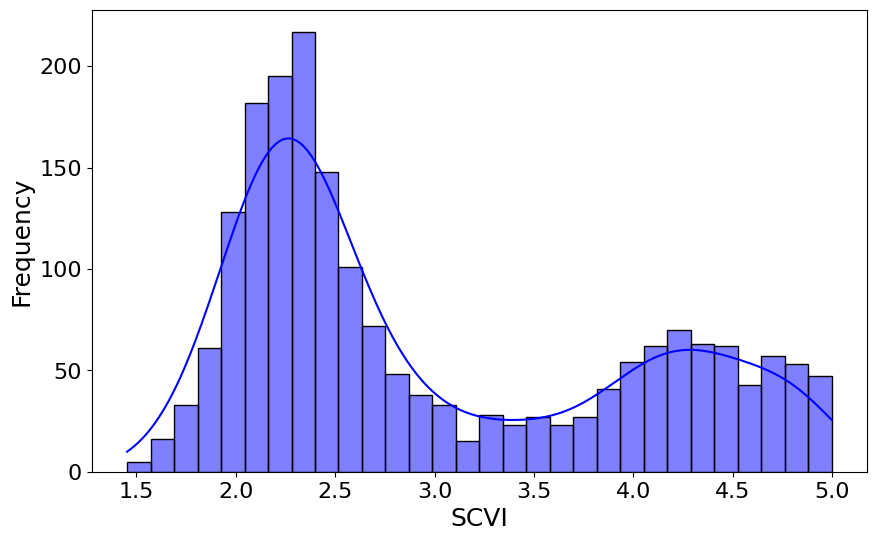

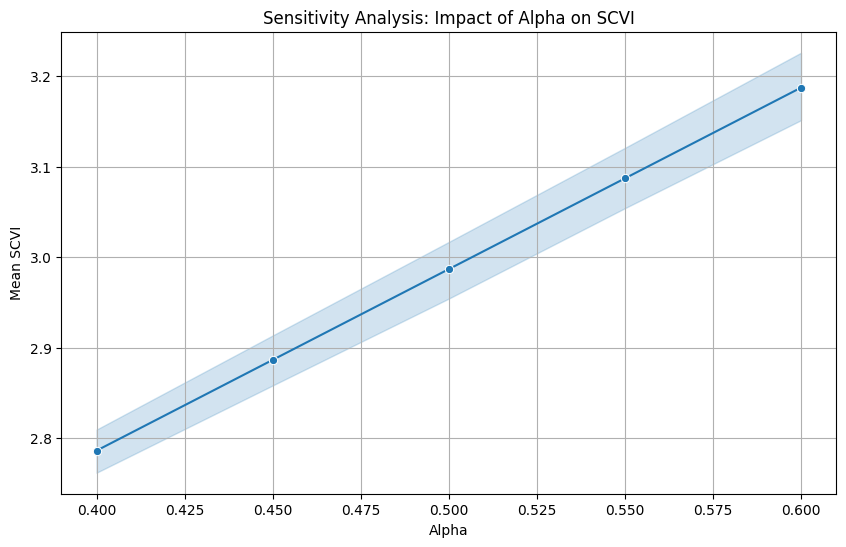

Cronbach's Alpha for IVI: nan
Cronbach's Alpha for ASI: 0.8654294904463167


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Monte Carlo Simulation
def monte_carlo_simulation(df, num_simulations=10000):
    results = []
    for _ in range(num_simulations):
        # Randomly sample weights for IVI and ASI
        alpha = np.random.uniform(0.4, 0.6)
        beta = 1 - alpha

        # Random weights for IVI components
        w_A = np.random.uniform(0.1, 0.4)
        w_B = np.random.uniform(0.1, 0.4)
        w_P = np.random.uniform(0.1, 0.4)
        w_E = 1 - (w_A + w_B + w_P)

        # Compute IVI
        IVI = (
            w_A * (df["A1_factor"] + df["A2_factor"])
            + w_B * df["B1_factor"]
            + w_P * (df["P1_factor"] + df["P2_factor"])
            + w_E * (df["E1_factor"] + df["E2_factor"])
        )

        # Compute ASI
        ASI = (
            df["Frequency"] * np.random.uniform(0.2, 0.5) +
            df["Consequence"] * np.random.uniform(0.2, 0.5) +
            df["Realism"] * np.random.uniform(0.2, 0.5)
        )

        # Compute SCVI
        SCVI = alpha * IVI + beta * ASI
        SCVI = np.clip(SCVI, 0, 5)
        results.append(SCVI)

    # Convert results to DataFrame
    simulation_results = pd.DataFrame(results).T
    simulation_results.columns = [f"Sim_{i+1}" for i in range(num_simulations)]

    return simulation_results

# Sensitivity Analysis
def sensitivity_analysis(df):
    parameters = {
        "alpha": np.linspace(0.4, 0.6, 5),
        "w_A": np.linspace(0.1, 0.4, 5),
        "w_B": np.linspace(0.1, 0.4, 5),
        "w_P": np.linspace(0.1, 0.4, 5)
    }

    sensitivities = []
    for alpha in parameters["alpha"]:
        beta = 1 - alpha
        for w_A in parameters["w_A"]:
            for w_B in parameters["w_B"]:
                for w_P in parameters["w_P"]:
                    w_E = 1 - (w_A + w_B + w_P)
                    IVI = (
                        w_A * (df["A1_factor"] + df["A2_factor"])
                        + w_B * df["B1_factor"]
                        + w_P * (df["P1_factor"] + df["P2_factor"])
                        + w_E * (df["E1_factor"] + df["E2_factor"])
                    )
                    ASI = df["ASI"]
                    SCVI = alpha * IVI + beta * ASI
                    sensitivities.append({
                        "alpha": alpha,
                        "w_A": w_A,
                        "w_B": w_B,
                        "w_P": w_P,
                        "mean_SCVI": SCVI.mean()
                    })

    return pd.DataFrame(sensitivities)

# Cronbach's Alpha Test
def cronbach_alpha(df, component_columns):
    data_values = df[component_columns].values
    item_variances = np.var(data_values, axis=0, ddof=1)
    total_variance = np.var(np.sum(data_values, axis=1), ddof=1)
    num_items = data_values.shape[1]
    alpha = num_items / (num_items - 1) * (1 - np.sum(item_variances) / total_variance)
    return alpha

# Run Monte Carlo Simulation
simulation_results = monte_carlo_simulation(df)
simulation_means = simulation_results.mean(axis=1)

# Plot Monte Carlo Results
plt.figure(figsize=(10, 6))
sns.histplot(simulation_means, kde=True, bins=30, color="blue")
#plt.title("Monte Carlo Simulation: Distribution of SCVI")
plt.xlabel("SCVI", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("Montecarlo_ipoll")
plt.show()

# Run Sensitivity Analysis
sensitivity_results = sensitivity_analysis(df)

# Plot Sensitivity Analysis Results
plt.figure(figsize=(10, 6))
sns.lineplot(data=sensitivity_results, x="alpha", y="mean_SCVI", marker="o")
plt.title("Sensitivity Analysis: Impact of Alpha on SCVI")
plt.xlabel("Alpha")
plt.ylabel("Mean SCVI")
plt.grid()
plt.show()

# Run Cronbach's Alpha Test
alpha_ivi = cronbach_alpha(df, ["A1_factor", "A2_factor", "B1_factor", "E1_factor", "E2_factor", "P1_factor", "P2_factor"])
alpha_asi = cronbach_alpha(df, ["Frequency", "Consequence", "Realism"])

print(f"Cronbach's Alpha for IVI: {alpha_ivi}")
print(f"Cronbach's Alpha for ASI: {alpha_asi}")


           A1_factor  A2_factor  B1_factor  E1_factor  E2_factor  P1_factor  \
A1_factor   1.000000   0.145611  -0.024861   0.238807  -0.082897   0.218075   
A2_factor   0.145611   1.000000   0.027284   0.331335  -0.164204   0.320826   
B1_factor  -0.024861   0.027284   1.000000   0.230671   0.270371   0.192101   
E1_factor   0.238807   0.331335   0.230671   1.000000   0.143036   0.384152   
E2_factor  -0.082897  -0.164204   0.270371   0.143036   1.000000  -0.014637   
P1_factor   0.218075   0.320826   0.192101   0.384152  -0.014637   1.000000   
P2_factor   0.024198  -0.001573   0.484666   0.228076   0.255150   0.051189   

           P2_factor  
A1_factor   0.024198  
A2_factor  -0.001573  
B1_factor   0.484666  
E1_factor   0.228076  
E2_factor   0.255150  
P1_factor   0.051189  
P2_factor   1.000000  


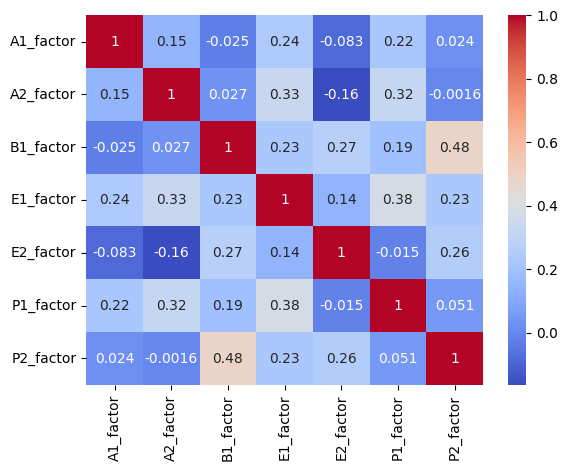

In [ ]:
correlation_matrix = df[["A1_factor", "A2_factor", "B1_factor", "E1_factor", "E2_factor", "P1_factor", "P2_factor"]].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


In [ ]:
print(df[["A1_factor", "A2_factor", "B1_factor", "E1_factor", "E2_factor", "P1_factor", "P2_factor"]].var())


A1_factor    0.417352
A2_factor    1.348936
B1_factor    0.977876
E1_factor    0.316069
E2_factor    1.510626
P1_factor    0.904429
P2_factor    1.123464
dtype: float64


In [ ]:
data_values = df[["A1_factor", "A2_factor", "B1_factor", "E1_factor", "E2_factor", "P1_factor", "P2_factor"]].values
item_variances = np.var(data_values, axis=0, ddof=1)
total_variance = np.var(np.sum(data_values, axis=1), ddof=1)
num_items = data_values.shape[1]

print(f"Item Variances: {item_variances}")
print(f"Total Variance: {total_variance}")
print(f"Number of Items: {num_items}")


Item Variances: [0.47086437 1.78168415 1.00782035 0.49970722 0.71700667 1.35581112
 1.22509227]
Total Variance: 13.186035681883075
Number of Items: 7


In [ ]:
def alpha_if_item_deleted(df, columns):
    results = {}
    for col in columns:
        subset = [c for c in columns if c != col]
        alpha = cronbach_alpha(df, subset)
        results[col] = alpha
    return results

ivi_columns = ["A1_factor", "A2_factor", "B1_factor", "E1_factor", "E2_factor", "P1_factor", "P2_factor"]
deleted_alpha = alpha_if_item_deleted(df, ivi_columns)

# Display results
print("Cronbach's Alpha if Item Deleted:")
for col, alpha in deleted_alpha.items():
    print(f"{col}: {alpha}")


Cronbach's Alpha if Item Deleted:
A1_factor: 0.5392007105199591
A2_factor: 0.5550918661350182
B1_factor: 0.4611306745096876
E1_factor: 0.438990779543071
E2_factor: 0.5582134044684942
P1_factor: 0.4642258752382218
P2_factor: 0.4918836352443416


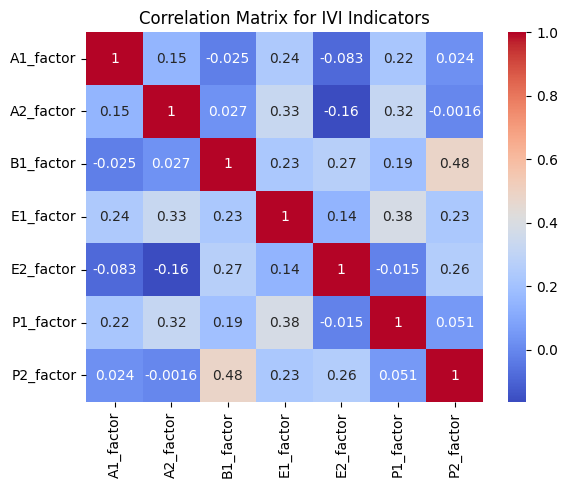

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[ivi_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for IVI Indicators")
plt.show()


In [ ]:
# Example: After identifying and removing an indicator
updated_ivi_columns = ["A1_factor", "A2_factor", "B1_factor", "E1_factor", "P1_factor", "P2_factor"]  # Example
alpha_ivi_updated = cronbach_alpha(df, updated_ivi_columns)
print(f"Cronbach's Alpha for Updated IVI: {alpha_ivi_updated}")


Cronbach's Alpha for Updated IVI: 0.5582134044684942


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[ivi_columns] = scaler.fit_transform(df[ivi_columns])
alpha_ivi_scaled = cronbach_alpha(df, ivi_columns)
print(f"Cronbach's Alpha for Scaled IVI: {alpha_ivi_scaled}")


Cronbach's Alpha for Scaled IVI: 0.5623887665213858


In [ ]:
w_A = 0.2  # Lower weight for awareness (A2_factor)
w_B = 0.3  # Higher weight for behavior (B1_factor)
w_P = 0.3  # Higher weight for psychological factors (P2_factor)
w_E = 0.2  # Lower weight for experience (E2_factor)


In [ ]:
df["IVI"] = (
    w_A * df["A2_factor"] +
    w_B * df["B1_factor"] +
    w_P * (df["P1_factor"] + df["P2_factor"]) +
    w_E * df["E2_factor"]
)
alpha_final = cronbach_alpha(df, updated_ivi_columns)
print(f"Final Cronbach's Alpha for Adjusted IVI: {alpha_final}")


Final Cronbach's Alpha for Adjusted IVI: 0.5846740125695257


In [ ]:
from sklearn.decomposition import PCA

# Perform PCA on the IVI columns
pca = PCA(n_components=2)  # Example: Reduce to 2 components
ivi_data = df[updated_ivi_columns].values
pca_result = pca.fit_transform(ivi_data)

# Explained Variance Ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Add PCA components to the dataframe
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

# Recompute Cronbach's Alpha with PCA components
pca_columns = ["PCA1", "PCA2"]
alpha_pca = cronbach_alpha(df, pca_columns)
print(f"Cronbach's Alpha after PCA: {alpha_pca}")


Explained Variance Ratio: [0.33440611 0.23100064]
Cronbach's Alpha after PCA: -4.440892098500626e-16


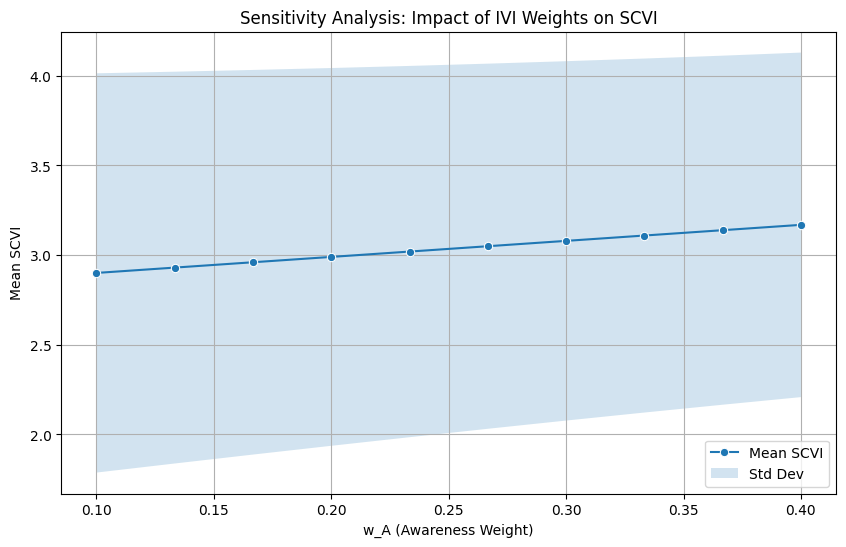

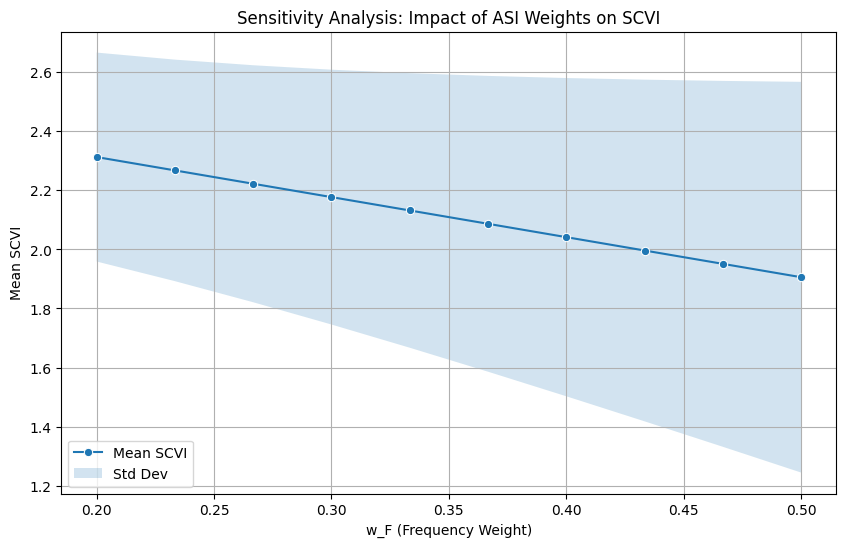

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def sensitivity_analysis_weights(df, weight_type="IVI", alpha=0.5):
    if weight_type == "IVI":
        weight_ranges = np.linspace(0.1, 0.4, 10)
        results = []

        for w_A in weight_ranges:
            w_B = 0.3  # Fixed value
            w_P = 0.3  # Fixed value
            w_E = 1 - (w_A + w_B + w_P)

            # Compute IVI
            IVI = (
                w_A * (df["A1_factor"] + df["A2_factor"]) +
                w_B * df["B1_factor"] +
                w_P * (df["P1_factor"] + df["P2_factor"]) +
                w_E * (df["E1_factor"] + df["E2_factor"])
            )

            # Compute ASI
            ASI = df["ASI"]

            # Compute SCVI
            SCVI = alpha * IVI + (1 - alpha) * ASI

            results.append({
                "Weight": w_A,
                "Mean SCVI": SCVI.mean(),
                "Std Dev SCVI": SCVI.std()
            })

        return pd.DataFrame(results)

    elif weight_type == "ASI":
        weight_ranges = np.linspace(0.2, 0.5, 10)
        results = []

        for w_F in weight_ranges:
            w_C = 0.4  # Fixed value
            w_R = 1 - (w_F + w_C)

            # Compute ASI
            ASI = (
                w_F * df["Frequency"] +
                w_C * df["Consequence"] +
                w_R * df["Realism"]
            )

            # Compute IVI (keeping weights constant)
            IVI = df["IVI"]

            # Compute SCVI
            SCVI = alpha * IVI + (1 - alpha) * ASI

            results.append({
                "Weight": w_F,
                "Mean SCVI": SCVI.mean(),
                "Std Dev SCVI": SCVI.std()
            })

        return pd.DataFrame(results)

# Perform sensitivity analysis for IVI weights
ivi_sensitivity = sensitivity_analysis_weights(df, weight_type="IVI")
asi_sensitivity = sensitivity_analysis_weights(df, weight_type="ASI")

# Plot IVI Weight Sensitivity
plt.figure(figsize=(10, 6))
sns.lineplot(data=ivi_sensitivity, x="Weight", y="Mean SCVI", label="Mean SCVI", marker="o")
plt.fill_between(ivi_sensitivity["Weight"],
                 ivi_sensitivity["Mean SCVI"] - ivi_sensitivity["Std Dev SCVI"],
                 ivi_sensitivity["Mean SCVI"] + ivi_sensitivity["Std Dev SCVI"],
                 alpha=0.2, label="Std Dev")
plt.title("Sensitivity Analysis: Impact of IVI Weights on SCVI")
plt.xlabel("w_A (Awareness Weight)")
plt.ylabel("Mean SCVI")
plt.legend()
plt.grid()
plt.show()

# Plot ASI Weight Sensitivity
plt.figure(figsize=(10, 6))
sns.lineplot(data=asi_sensitivity, x="Weight", y="Mean SCVI", label="Mean SCVI", marker="o")
plt.fill_between(asi_sensitivity["Weight"],
                 asi_sensitivity["Mean SCVI"] - asi_sensitivity["Std Dev SCVI"],
                 asi_sensitivity["Mean SCVI"] + asi_sensitivity["Std Dev SCVI"],
                 alpha=0.2, label="Std Dev")
plt.title("Sensitivity Analysis: Impact of ASI Weights on SCVI")
plt.xlabel("w_F (Frequency Weight)")
plt.ylabel("Mean SCVI")
plt.legend()
plt.grid()
plt.show()


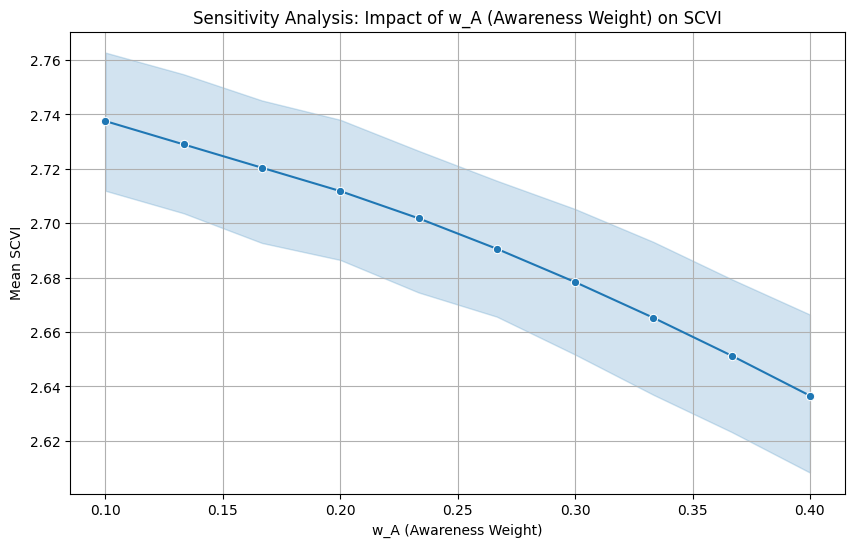

In [ ]:
import numpy as np
def sensitivity_analysis_ivi_factors(df, alpha=0.5):
    weight_ranges = np.linspace(0.1, 0.4, 10)
    results = []

    # Iterate over weight ranges for each factor
    for w_A in weight_ranges:
        for w_B in weight_ranges:
            for w_P in weight_ranges:
                w_E = 1 - (w_A + w_B + w_P)
                if w_E < 0:  # Skip invalid combinations
                    continue

                # Compute IVI
                IVI = (
                    w_A * (df["A1_factor"] + df["A2_factor"] ) +
                    w_B * df["B1_factor"] +
                    w_P * (df["P1_factor"] + df["P2_factor"]) +
                    w_E * (df["E1_factor"] + df["E2_factor"])
                )

                # Compute ASI
                ASI = df["ASI"]

                # Compute SCVI
                SCVI = alpha * IVI + (1 - alpha) * ASI

                results.append({
                    "w_A": w_A,
                    "w_B": w_B,
                    "w_P": w_P,
                    "w_E": w_E,
                    "Mean SCVI": SCVI.mean(),
                    "Std Dev SCVI": SCVI.std()
                })

    return pd.DataFrame(results)

# Perform sensitivity analysis for IVI factors
ivi_factor_sensitivity = sensitivity_analysis_ivi_factors(df)

# Visualize Sensitivity Analysis for IVI Factors (w_A example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=ivi_factor_sensitivity, x="w_A", y="Mean SCVI", marker="o")
plt.title("Sensitivity Analysis: Impact of w_A (Awareness Weight) on SCVI")
plt.xlabel("w_A (Awareness Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.show()


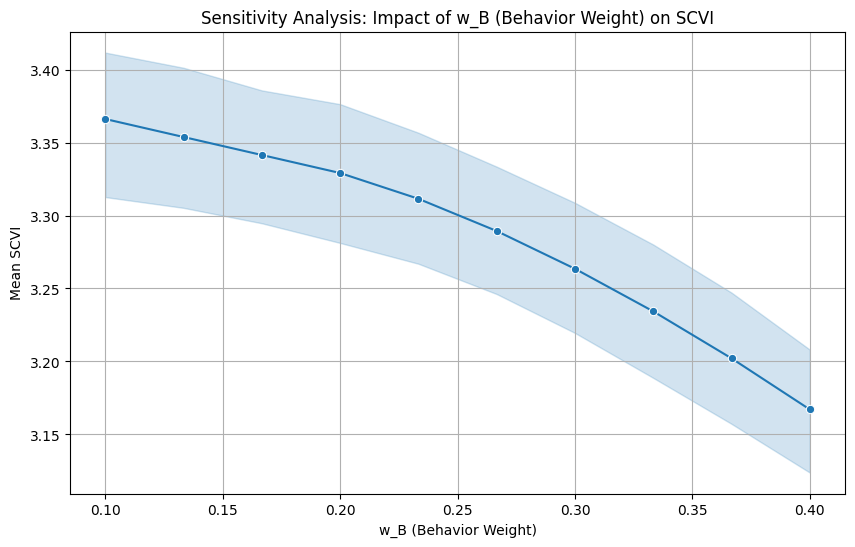

In [ ]:
# Visualize Sensitivity Analysis for IVI Factors (w_B example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=ivi_factor_sensitivity, x="w_B", y="Mean SCVI", marker="o")
plt.title("Sensitivity Analysis: Impact of w_B (Behavior Weight) on SCVI")
plt.xlabel("w_B (Behavior Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.show()


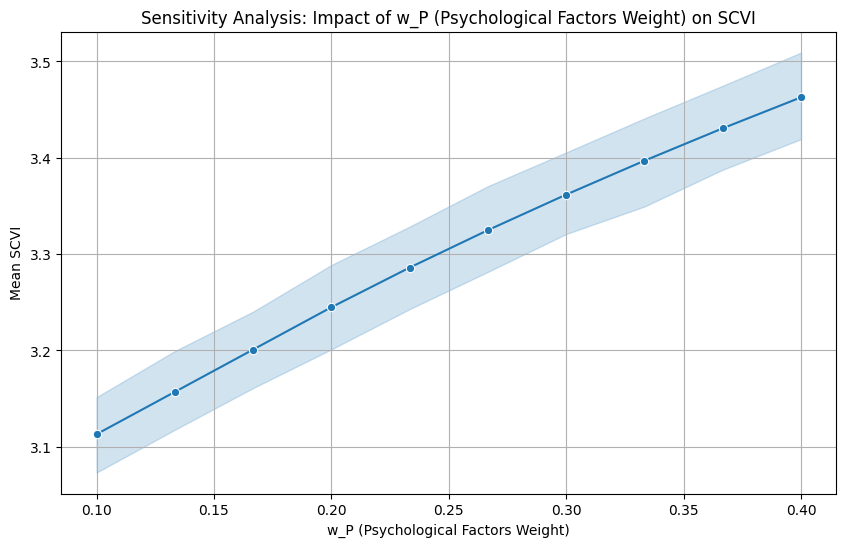

In [ ]:
# Visualize Sensitivity Analysis for IVI Factors (w_P example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=ivi_factor_sensitivity, x="w_P", y="Mean SCVI", marker="o")
plt.title("Sensitivity Analysis: Impact of w_P (Psychological Factors Weight) on SCVI")
plt.xlabel("w_P (Psychological Factors Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.show()


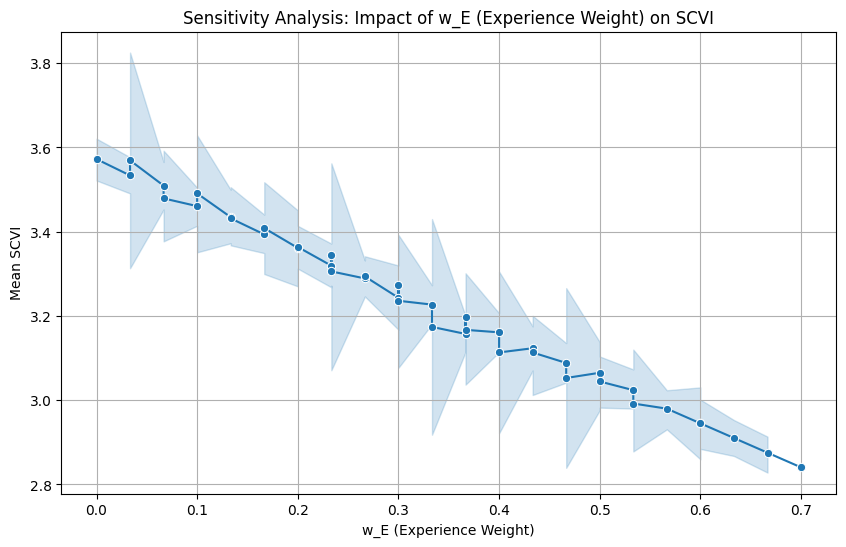

In [ ]:
# Visualize Sensitivity Analysis for IVI Factors (w_E example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=ivi_factor_sensitivity, x="w_E", y="Mean SCVI", marker="o")
plt.title("Sensitivity Analysis: Impact of w_E (Experience Weight) on SCVI")
plt.xlabel("w_E (Experience Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.show()


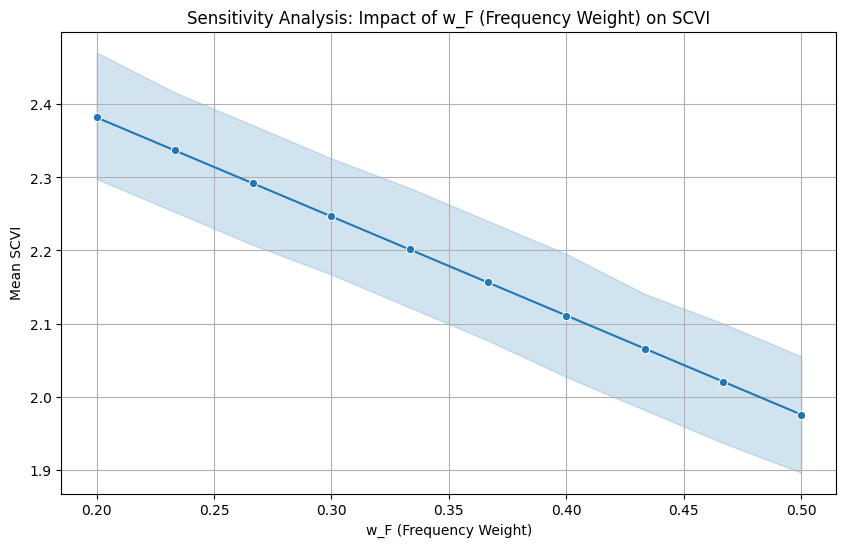

In [ ]:
def sensitivity_analysis_asi_factors(df, alpha=0.5):
    weight_ranges = np.linspace(0.2, 0.5, 10)
    results = []

    # Iterate over weight ranges for each factor
    for w_F in weight_ranges:
        for w_C in weight_ranges:
            w_R = 1 - (w_F + w_C)
            if w_R < 0:  # Skip invalid combinations
                continue

            # Compute ASI
            ASI = (
                w_F * df["Frequency"] +
                w_C * df["Consequence"] +
                w_R * df["Realism"]
            )

            # Compute IVI
            IVI = df["IVI"]

            # Compute SCVI
            SCVI = alpha * IVI + (1 - alpha) * ASI

            results.append({
                "w_F": w_F,
                "w_C": w_C,
                "w_S": w_R,
                "Mean SCVI": SCVI.mean(),
                "Std Dev SCVI": SCVI.std()
            })

    return pd.DataFrame(results)

# Perform sensitivity analysis for ASI factors
asi_factor_sensitivity = sensitivity_analysis_asi_factors(df)

# Visualize Sensitivity Analysis for ASI Factors (w_F example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=asi_factor_sensitivity, x="w_F", y="Mean SCVI", marker="o")
plt.title("Sensitivity Analysis: Impact of w_F (Frequency Weight) on SCVI")
plt.xlabel("w_F (Frequency Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.show()


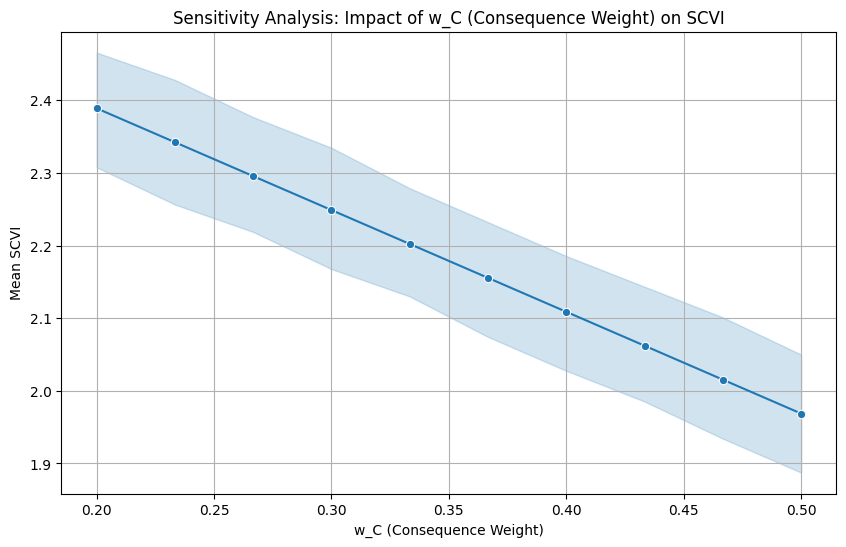

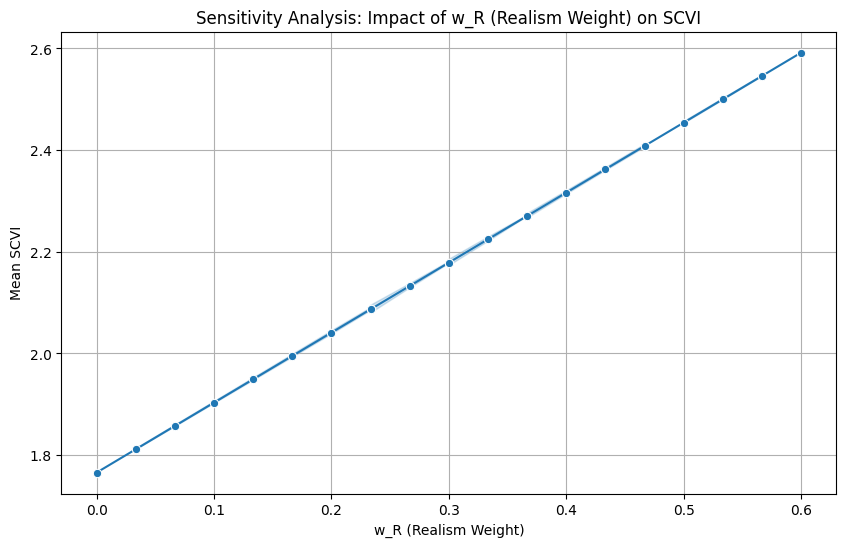

In [ ]:
# Visualize Sensitivity Analysis for ASI Factors (w_C example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=asi_factor_sensitivity, x="w_C", y="Mean SCVI", marker="o")
plt.title("Sensitivity Analysis: Impact of w_C (Consequence Weight) on SCVI")
plt.xlabel("w_C (Consequence Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.show()

# Visualize Sensitivity Analysis for ASI Factors (w_R example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=asi_factor_sensitivity, x="w_S", y="Mean SCVI", errorbar='sd', marker="o")

plt.title("Sensitivity Analysis: Impact of w_R (Realism Weight) on SCVI")
plt.xlabel("w_R (Realism Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.show()


In [ ]:
ivi_factor_sensitivity

,w_A,w_B,w_P,w_E,Mean SCVI,Std Dev SCVI
0,0.1,0.100000,0.100000,0.700000,2.710610,1.204947
1,0.1,0.100000,0.133333,0.666667,2.754524,1.194962
2,0.1,0.100000,0.166667,0.633333,2.798438,1.185555
3,0.1,0.100000,0.200000,0.600000,2.842353,1.176740
4,0.1,0.100000,0.233333,0.566667,2.886267,1.168528
...,...,...,...,...,...,...
939,0.4,0.366667,0.233333,0.000000,3.055629,0.959515
940,0.4,0.400000,0.100000,0.100000,2.867625,0.970242
941,0.4,0.400000,0.133333,0.066667,2.911539,0.965990
942,0.4,0.400000,0.166667,0.033333,2.955454,0.962535


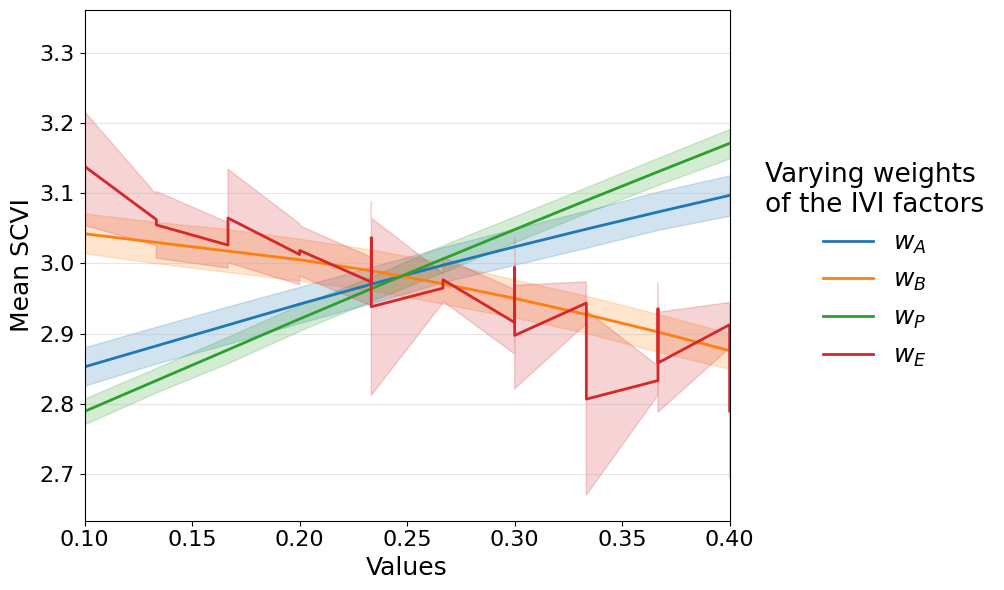

NameError: name 'asi_factor_sensitivity' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example data (replace with your actual data)
# Assuming `ivi_factor_sensitivity` and `asi_factor_sensitivity` are available as DataFrames
# with columns for the factors (`w_A`, `w_B`, etc.) and the `Mean SCVI` values.

# Combine IVI factors in one plot
plt.figure(figsize=(12, 6))
ivi_factors = ['w_A', 'w_B', 'w_P', 'w_E']
for factor in ivi_factors:
    # Format factor for LaTeX
    label = r'$w_{' + factor.split('_')[1] + r'}$'
    sns.lineplot(data=ivi_factor_sensitivity, x=factor, y='Mean SCVI', label=label, linewidth=2)

# Format IVI plot
plt.xlabel('Values', fontsize=18)
plt.ylabel('Mean SCVI', fontsize=18)
plt.xlim(0.1, 0.4) if 'w_E' in ivi_factors else None
plt.tick_params(axis='both', which='major', labelsize=16)

# Legend outside the plot
plt.legend(
    title="Varying weights\nof the IVI factors",  # Multiline legend title
    fontsize=18,
    title_fontsize=19,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),  # Position legend outside the plot to the right
    frameon=False
)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for the legend
plt.savefig("Ipoll_ivi_factors.jpeg", bbox_inches='tight')
plt.show()

# Combine ASI factors in one plot
plt.figure(figsize=(12, 6))
asi_factors = ['w_F', 'w_C', 'w_S']
for factor in asi_factors:
    # Format factor for LaTeX
    label = r'$w_{' + factor.split('_')[1] + r'}$'
    sns.lineplot(data=asi_factor_sensitivity, x=factor, y='Mean SCVI', label=label, linewidth=2)

# Format ASI plot
plt.xlabel('Values', fontsize=18)
plt.ylabel('Mean SCVI', fontsize=18)
plt.xlim(0.2, 0.5) if 'w_S' in asi_factors else None
plt.tick_params(axis='both', which='major', labelsize=16)

# Legend outside the plot
plt.legend(
    title="Varying weights\nof the ASI factors",  # Multiline legend title
    fontsize=18,
    title_fontsize=19,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),  # Position legend outside the plot to the right
    frameon=False
)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for the legend
plt.savefig("Ipoll_asi_factors.jpeg", bbox_inches='tight')
plt.show()


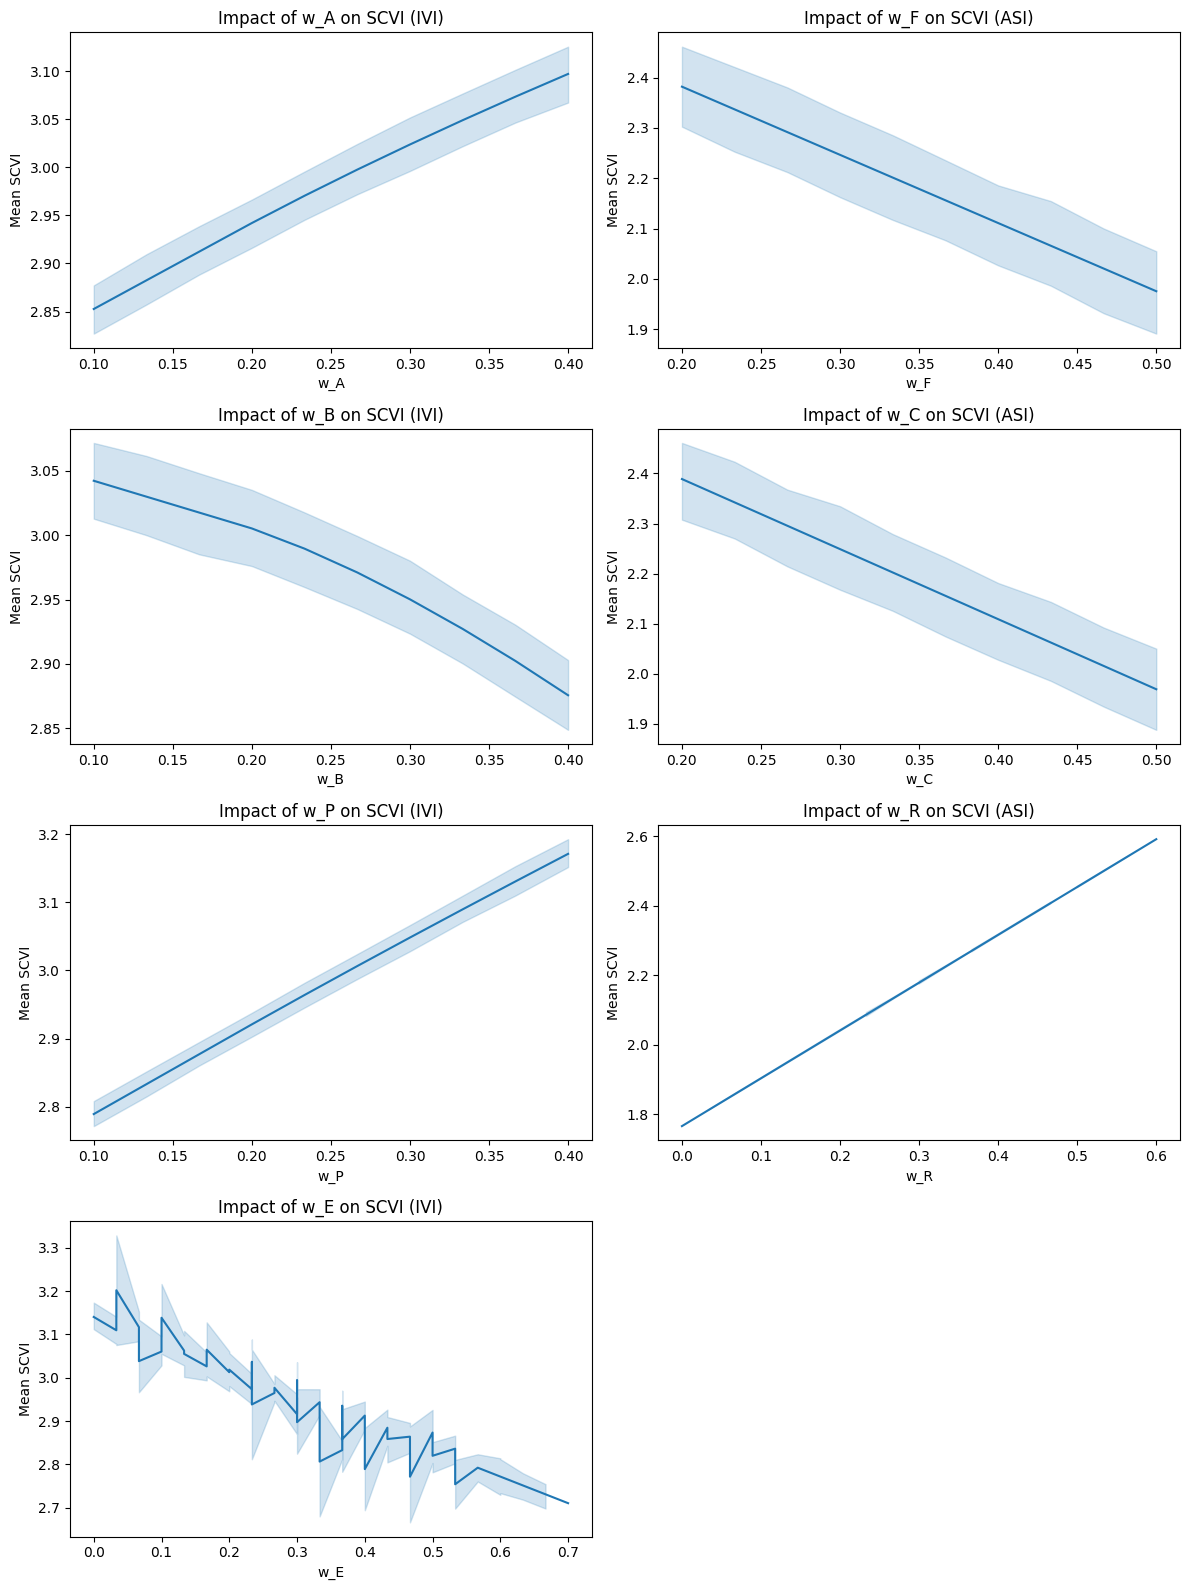

In [ ]:
# Re-import necessary libraries after reset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

# IVI Factors: w_A, w_B, w_P, w_E
ivi_factors = ['w_A', 'w_B', 'w_P', 'w_E']
for i, factor in enumerate(ivi_factors):
    sns.lineplot(data=ivi_factor_sensitivity, x=factor, y='Mean SCVI', ax=axes[i, 0])
    axes[i, 0].set_title(f'Impact of {factor} on SCVI (IVI)')
    axes[i, 0].set_xlabel(f'{factor}')
    axes[i, 0].set_ylabel('Mean SCVI')

# ASI Factors: w_F, w_C, w_R
asi_factors = ['w_F', 'w_C', 'w_R']
for i, factor in enumerate(asi_factors):
    sns.lineplot(data=asi_factor_sensitivity, x=factor, y='Mean SCVI', ax=axes[i, 1])
    axes[i, 1].set_title(f'Impact of {factor} on SCVI (ASI)')
    axes[i, 1].set_xlabel(f'{factor}')
    axes[i, 1].set_ylabel('Mean SCVI')

# Adjusting unused subplot (if the number of IVI and ASI factors are not the same)
if len(ivi_factors) > len(asi_factors):
    fig.delaxes(axes[len(asi_factors), 1])  # This deletes the last ASI subplot if there are fewer ASI factors

plt.tight_layout()
plt.savefig("Ipoll_sensitivity.jpeg")
plt.show()


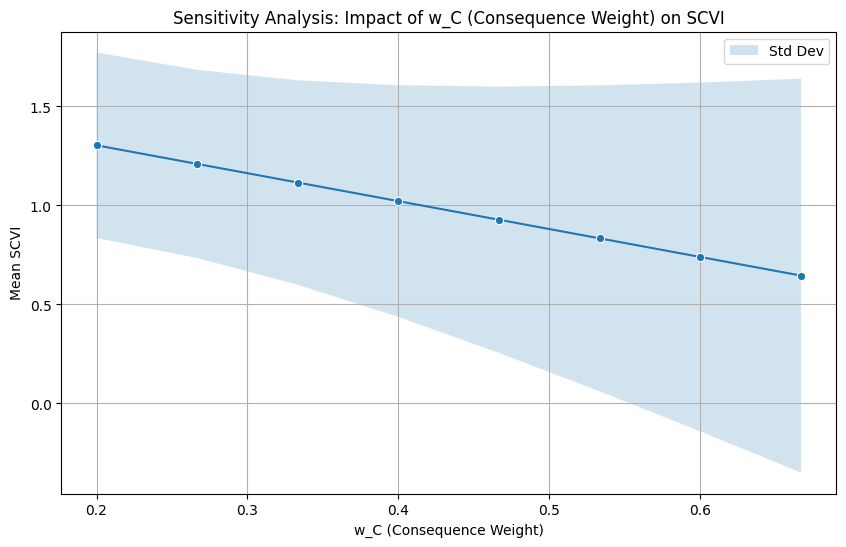

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def sensitivity_analysis_asi_factor_wC(df, alpha=0.5):
    weight_ranges = np.linspace(0.2, 0.8, 10)  # Adjust the range for w_C
    results = []

    # Fix w_F and adjust w_R dynamically based on w_C
    w_F = 0.3  # Fixed value for frequency
    for w_C in weight_ranges:
        w_R = 1 - (w_F + w_C)
        if w_R < 0:  # Skip invalid combinations
            continue

        # Compute ASI
        ASI = (
            w_F * df["Frequency"] +
            w_C * df["Consequence"] +
            w_R * df["Realism"]
        )

        # Compute IVI
        IVI = df["IVI"]

        # Compute SCVI
        SCVI = alpha * IVI + (1 - alpha) * ASI

        results.append({
            "w_C": w_C,
            "w_R": w_R,
            "Mean SCVI": SCVI.mean(),
            "Std Dev SCVI": SCVI.std()
        })

    return pd.DataFrame(results)

# Perform sensitivity analysis for w_C
asi_factor_sensitivity_wC = sensitivity_analysis_asi_factor_wC(df)

# Visualize Sensitivity Analysis for w_C
plt.figure(figsize=(10, 6))
sns.lineplot(data=asi_factor_sensitivity_wC, x="w_C", y="Mean SCVI", marker="o")
plt.fill_between(asi_factor_sensitivity_wC["w_C"],
                 asi_factor_sensitivity_wC["Mean SCVI"] - asi_factor_sensitivity_wC["Std Dev SCVI"],
                 asi_factor_sensitivity_wC["Mean SCVI"] + asi_factor_sensitivity_wC["Std Dev SCVI"],
                 alpha=0.2, label="Std Dev")
plt.title("Sensitivity Analysis: Impact of w_C (Consequence Weight) on SCVI")
plt.xlabel("w_C (Consequence Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.legend()
plt.show()


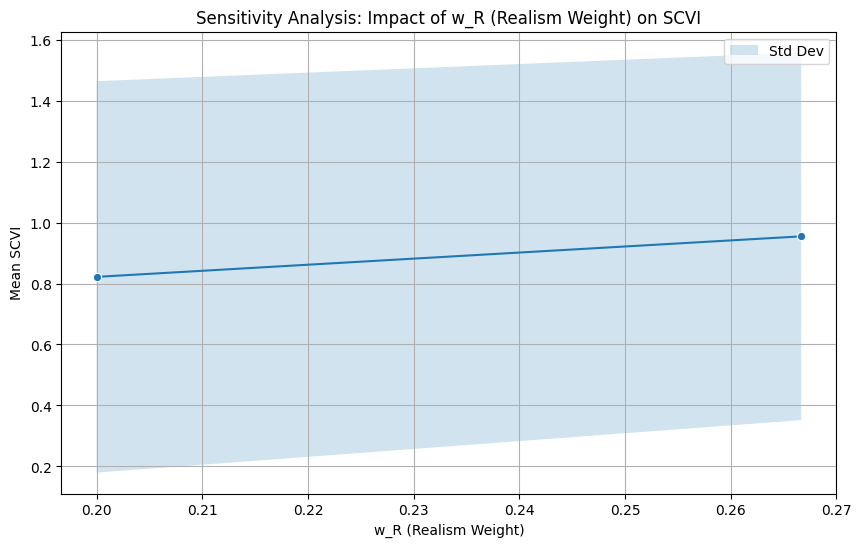

In [ ]:
def sensitivity_analysis_asi_factor_wR(df, alpha=0.5):
    weight_ranges = np.linspace(0.2, 0.8, 10)  # Adjust the range for w_R
    results = []

    # Fix w_F and w_C, adjust w_R dynamically
    w_F = 0.3  # Fixed value for frequency
    w_C = 0.4  # Fixed value for consequence
    for w_R in weight_ranges:
        if w_F + w_C + w_R > 1:  # Ensure weights sum to 1
            continue

        # Compute ASI
        ASI = (
            w_F * df["Frequency"] +
            w_C * df["Consequence"] +
            w_R * df["Realism"]
        )

        # Compute IVI
        IVI = df["IVI"]

        # Compute SCVI
        SCVI = alpha * IVI + (1 - alpha) * ASI

        results.append({
            "w_R": w_R,
            "Mean SCVI": SCVI.mean(),
            "Std Dev SCVI": SCVI.std()
        })

    return pd.DataFrame(results)

# Perform sensitivity analysis for w_R
asi_factor_sensitivity_wR = sensitivity_analysis_asi_factor_wR(df)

# Visualize Sensitivity Analysis for w_R
plt.figure(figsize=(10, 6))
sns.lineplot(data=asi_factor_sensitivity_wR, x="w_R", y="Mean SCVI", marker="o")
plt.fill_between(asi_factor_sensitivity_wR["w_R"],
                 asi_factor_sensitivity_wR["Mean SCVI"] - asi_factor_sensitivity_wR["Std Dev SCVI"],
                 asi_factor_sensitivity_wR["Mean SCVI"] + asi_factor_sensitivity_wR["Std Dev SCVI"],
                 alpha=0.2, label="Std Dev")
plt.title("Sensitivity Analysis: Impact of w_R (Realism Weight) on SCVI")
plt.xlabel("w_R (Realism Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.legend()
plt.show()


In [ ]:
# Monte Carlo Simulation
def monte_carlo_simulation(df, num_simulations=10000):
    results = []
    for _ in range(num_simulations):
        # Randomly sample weights for IVI and ASI
        alpha = np.random.uniform(0.4, 0.6)
        beta = 1 - alpha

        # Random weights for IVI components
        w_A = np.random.uniform(0.1, 0.4)
        w_B = np.random.uniform(0.1, 0.4)
        w_P = np.random.uniform(0.1, 0.4)
        w_E = 1 - (w_A + w_B + w_P)

        # Compute IVI
        IVI = (
            w_A * (df["A1_factor"] + df["A2_factor"])
            + w_B * df["B1_factor"]
            + w_P * (df["P1_factor"] + df["P2_factor"])
            + w_E * (df["E1_factor"] + df["E2_factor"])
        )

        # Compute ASI
        ASI = (
            df["Frequency"] * np.random.uniform(0.2, 0.5) +
            df["Consequence"] * np.random.uniform(0.2, 0.5) +
            df["Realism"] * np.random.uniform(0.2, 0.5)
        )

        # Compute SCVI
        SCVI = alpha * IVI + beta * ASI
        SCVI = np.clip(SCVI, 0, 5)
        results.append(SCVI)

    # Convert results to DataFrame
    simulation_results = pd.DataFrame(results).T
    simulation_results.columns = [f"Sim_{i+1}" for i in range(num_simulations)]

    return simulation_results


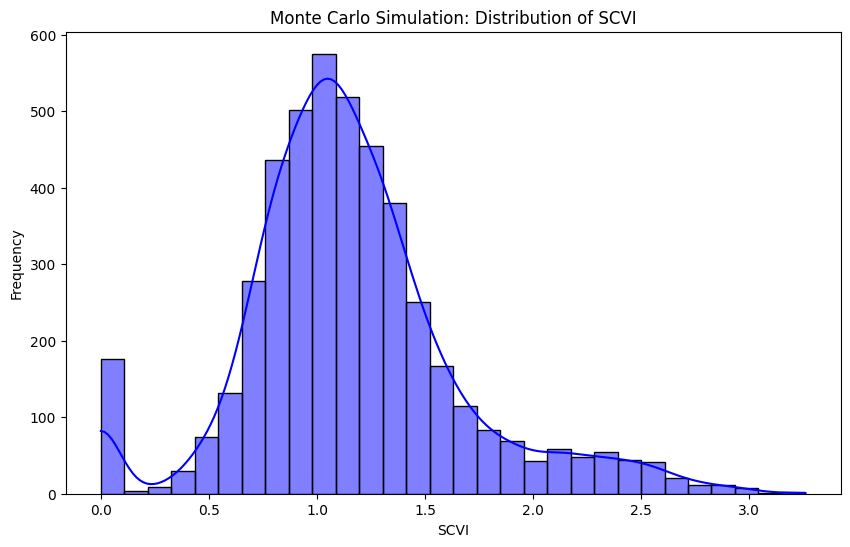

In [ ]:
# Run Monte Carlo Simulation
simulation_results = monte_carlo_simulation(df)
simulation_means = simulation_results.mean(axis=1)

# Plot Monte Carlo Results
plt.figure(figsize=(10, 6))
sns.histplot(simulation_means, kde=True, bins=30, color="blue")
plt.title("Monte Carlo Simulation: Distribution of SCVI")
plt.xlabel("SCVI")
plt.ylabel("Frequency")
plt.show()


In [ ]:
import numpy as np
import pandas as pd

def monte_carlo_simulation(df, num_simulations=10000):
    results = []

    for _ in range(num_simulations):
        # Randomly sample weights for IVI and ASI
        alpha = np.random.uniform(0.4, 0.6)  # IVI weight
        beta = 1 - alpha  # ASI weight

        # Random weights for IVI components
        w_A = np.random.uniform(0.1, 0.4)
        w_B = np.random.uniform(0.1, 0.4)
        w_P = np.random.uniform(0.1, 0.4)
        w_E = 1 - (w_A + w_B + w_P)

        # Random weights for ASI components
        w_F = np.random.uniform(0.2, 0.5)
        w_C = np.random.uniform(0.2, 0.5)
        w_R = 1 - (w_F + w_C)

        # Compute IVI
        IVI = (
            w_A * (df["A1_factor"] + df["A2_factor"]) +
            w_B * df["B1_factor"] +
            w_P * (df["P1_factor"] + df["P2_factor"]) +
            w_E * (df["E1_factor"] + df["E2_factor"])
        )
        IVI = np.clip(IVI, 0, 5)  # Ensure IVI is within [0, 5]

        # Compute ASI
        ASI = (
            w_F * df["Frequency"] +
            w_C * df["Consequence"] +
            w_R * df["Realism"]
        )
        ASI = np.clip(ASI, 0, 5)  # Ensure ASI is within [0, 5]

        # Compute SCVI
        SCVI = alpha * IVI + beta * ASI
        SCVI = np.clip(SCVI, 0, 5)  # Ensure SCVI is within [0, 5]

        # Store the configuration, IVI, ASI, and SCVI
        results.append({
            "w_A": w_A,
            "w_B": w_B,
            "w_P": w_P,
            "w_E": w_E,
            "w_F": w_F,
            "w_C": w_C,
            "w_R": w_R,
            "IVI": IVI.mean(),
            "ASI": ASI.mean(),
            "SCVI": SCVI.mean()
        })

    # Convert results to DataFrame
    return pd.DataFrame(results)


In [ ]:
simulation_results = monte_carlo_simulation(df)


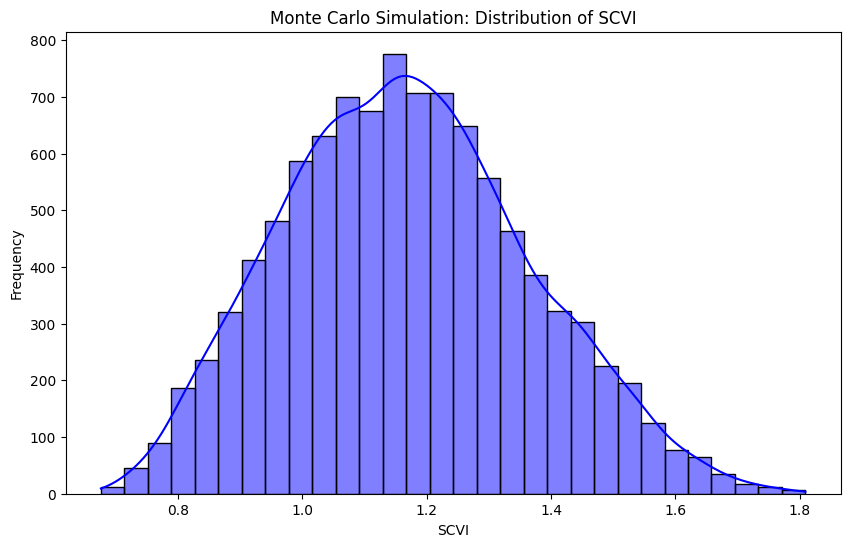

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
simulation_means = simulation_results["SCVI"]

# Plot Monte Carlo Results
plt.figure(figsize=(10, 6))
sns.histplot(simulation_means, kde=True, bins=30, color="blue")
plt.title("Monte Carlo Simulation: Distribution of SCVI")
plt.xlabel("SCVI")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Group SCVI into two ranges
group_1 = simulation_results[(simulation_results['SCVI'] >= 1.5) & (simulation_results['SCVI'] <= 2.5)]
group_2 = simulation_results[(simulation_results['SCVI'] >= 3.5) & (simulation_results['SCVI'] <= 4.5)]

# Summarize weight configurations for each group
group_1_weights = group_1[["w_A", "w_B", "w_P", "w_E", "w_F", "w_C", "w_R"]].describe()
group_2_weights = group_2[["w_A", "w_B", "w_P", "w_E", "w_F", "w_C", "w_R"]].describe()

print("Group 1 Weight Summary (Primary Peak):")
print(group_1_weights)

print("Group 2 Weight Summary (Secondary Peak):")
print(group_2_weights)


Group 1 Weight Summary (Primary Peak):
              w_A         w_B         w_P         w_E         w_F         w_C  \
count  560.000000  560.000000  560.000000  560.000000  560.000000  560.000000   
mean     0.250873    0.251351    0.252331    0.245445    0.255415    0.255287   
std      0.088726    0.085309    0.087339    0.154451    0.042682    0.041491   
min      0.100860    0.101001    0.100069   -0.161403    0.200055    0.200045   
25%      0.170155    0.178233    0.176742    0.139512    0.219024    0.220846   
50%      0.254764    0.255181    0.253594    0.242623    0.246671    0.246530   
75%      0.330604    0.324319    0.329577    0.360993    0.283754    0.281137   
max      0.399916    0.399310    0.399149    0.647342    0.389833    0.397029   

              w_R  
count  560.000000  
mean     0.489298  
std      0.047645  
min      0.398067  
25%      0.452247  
50%      0.488964  
75%      0.523625  
max      0.591807  
Group 2 Weight Summary (Secondary Peak):
       w_A

In [ ]:
# Compute mean IVI and ASI for each group
group_1_mean_ivi = group_1["IVI"].mean()
group_1_mean_asi = group_1["ASI"].mean()

group_2_mean_ivi = group_2["IVI"].mean()
group_2_mean_asi = group_2["ASI"].mean()

print(f"Group 1 - Mean IVI: {group_1_mean_ivi}, Mean ASI: {group_1_mean_asi}")
print(f"Group 2 - Mean IVI: {group_2_mean_ivi}, Mean ASI: {group_2_mean_asi}")


Group 1 - Mean IVI: 0.292129602530587, Mean ASI: 2.572736841515904
Group 2 - Mean IVI: nan, Mean ASI: nan


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the columns representing the factors
factor_columns = ["A1_factor", "A2_factor", "B1_factor", "E1_factor", "E2_factor", "P1_factor", "P2_factor"]

# Define the function to calculate Cronbach's Alpha
def cronbach_alpha(data_values):
    item_variances = np.var(data_values, axis=0, ddof=1)
    total_variance = np.var(np.sum(data_values, axis=1), ddof=1)
    num_items = data_values.shape[1]
    alpha = num_items / (num_items - 1) * (1 - np.sum(item_variances) / total_variance)
    return alpha

# Generate systematic combinations of weights
def generate_weight_combinations(step=0.05):
    weights_combinations = []
    for w_p in np.arange(0.2, 0.5, step):
        for w_a in np.arange(0.2, 0.5, step):
            for w_b in np.arange(0.05, 0.3, step):
                for w_e in np.arange(0.05, 0.3, step):
                    if round(w_p + w_a + w_b + w_e, 2) == 1.0:  # Ensure weights sum up to 1
                        weights_combinations.append({'w_P': w_p, 'w_A': w_a, 'w_B': w_b, 'w_E': w_e})
    return weights_combinations

# Normalize weights to sum to 1 (optional, for ensuring precision)
def normalize_weights(weights):
    total = sum(weights.values())
    return {key: value / total for key, value in weights.items()}

# Scale the factors to be between 0 and 5
def scale_factors(df, factor_columns):
    scaler = MinMaxScaler(feature_range=(0, 5))
    df[factor_columns] = scaler.fit_transform(df[factor_columns])
    return df

# Generate a table with all weight combinations and corresponding Cronbach's Alpha
def generate_alpha_table(df, factor_columns):
    alpha_results = []
    weights_combinations = generate_weight_combinations()

    for weights in weights_combinations:
        # Normalize weights to ensure they sum to 1
        weights = normalize_weights(weights)

        # Apply weights to the factors
        weighted_df = df[factor_columns].copy()
        weighted_df["E1_factor"] *= weights["w_E"]
        weighted_df["E2_factor"] *= weights["w_E"]
        weighted_df["P1_factor"] *= weights["w_P"]
        weighted_df["P2_factor"] *= weights["w_P"]
        weighted_df["B1_factor"] *= weights["w_B"]
        weighted_df["A1_factor"] *= weights["w_A"]
        weighted_df["A2_factor"] *= weights["w_A"]

        # Calculate Cronbach's Alpha
        alpha = cronbach_alpha(weighted_df.values)

        # Store the result with the corresponding weights
        alpha_results.append({
            "Cronbach_Alpha": alpha,
            "w_P": weights["w_P"],
            "w_A": weights["w_A"],
            "w_B": weights["w_B"],
            "w_E": weights["w_E"]
        })

    # Convert results to a DataFrame
    alpha_table = pd.DataFrame(alpha_results)
    return alpha_table

# Assuming `df` is your DataFrame containing the factors
# Uncomment and replace with your actual data loading code:
# df = pd.read_csv("path_to_your_dataset.csv")

# Scale the factors between 0 and 5
df = scale_factors(df, factor_columns)

# Generate the alpha table
alpha_table = generate_alpha_table(df, factor_columns)

# Print the alpha table
print(alpha_table)

# Optionally, save the table to a CSV file
alpha_table.to_csv("cronbach_alpha_table.csv", index=False)


     Cronbach_Alpha   w_P   w_A   w_B   w_E
0          0.505324  0.20  0.30  0.25  0.25
1          0.474728  0.20  0.35  0.20  0.25
2          0.468381  0.20  0.35  0.25  0.20
3          0.442328  0.20  0.40  0.15  0.25
4          0.438458  0.20  0.40  0.20  0.20
..              ...   ...   ...   ...   ...
100        0.412792  0.45  0.35  0.10  0.10
101        0.405123  0.45  0.35  0.15  0.05
102        0.392600  0.45  0.40  0.05  0.10
103        0.387022  0.45  0.40  0.10  0.05
104        0.368061  0.45  0.45  0.05  0.05

[105 rows x 5 columns]


In [ ]:
import numpy as np
import pandas as pd

# Define the columns representing the factors
factor_columns = ["A1_factor", "A2_factor", "B1_factor", "E1_factor", "E2_factor", "P1_factor", "P2_factor"]

# Define the function to calculate Cronbach's Alpha
def cronbach_alpha(data_values):
    item_variances = np.var(data_values, axis=0, ddof=1)
    total_variance = np.var(np.sum(data_values, axis=1), ddof=1)
    num_items = data_values.shape[1]
    alpha = num_items / (num_items - 1) * (1 - np.sum(item_variances) / total_variance)
    return alpha

# Scale the factors to be between 0 and 5
def scale_factors(df, factor_columns):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 5))
    df[factor_columns] = scaler.fit_transform(df[factor_columns])
    return df

# Test different combinations by varying w_P and w_A
def test_alpha_with_fixed_weights(df, factor_columns, w_b, w_e, w_p_start, w_p_end, step=0.01):
    results = []
    for w_p in np.arange(w_p_start, w_p_end, step):
        w_a = 1 - (w_p + w_b + w_e)  # Ensure weights sum to 1
        if w_a < 0:
            continue

        # Apply weights to the factors
        weighted_df = df[factor_columns].copy()
        weighted_df["E1_factor"] *= w_e
        weighted_df["E2_factor"] *= w_e
        weighted_df["P1_factor"] *= w_p
        weighted_df["P2_factor"] *= w_p
        weighted_df["B1_factor"] *= w_b
        weighted_df["A1_factor"] *= w_a
        weighted_df["A2_factor"] *= w_a

        # Calculate Cronbach's Alpha
        alpha = cronbach_alpha(weighted_df.values)

        # Store the result
        results.append({
            "Cronbach_Alpha": alpha,
            "w_P": w_p,
            "w_A": w_a,
            "w_B": w_b,
            "w_E": w_e
        })

    # Convert results to a DataFrame
    results_table = pd.DataFrame(results)
    return results_table

# Assuming `df` is your DataFrame containing the factors
# Uncomment and replace with your actual data loading code:
# df = pd.read_csv("path_to_your_dataset.csv")

# Scale the factors between 0 and 5
df = scale_factors(df, factor_columns)

# Test combinations with fixed w_B and w_E
w_b = 0.25  # Fixed value for w_B
w_e = 0.25  # Fixed value for w_E
w_p_start = 0.3  # Starting value for w_P
w_p_end = 0.45   # Ending value for w_P
alpha_table = test_alpha_with_fixed_weights(df, factor_columns, w_b, w_e, w_p_start, w_p_end)

# Print the resulting table
print(alpha_table)

# Optionally, save the table to a CSV file
# alpha_table.to_csv("alpha_test_table.csv", index=False)


    Cronbach_Alpha   w_P   w_A   w_B   w_E
0         0.551005  0.30  0.20  0.25  0.25
1         0.551093  0.31  0.19  0.25  0.25
2         0.550394  0.32  0.18  0.25  0.25
3         0.548932  0.33  0.17  0.25  0.25
4         0.546731  0.34  0.16  0.25  0.25
5         0.543820  0.35  0.15  0.25  0.25
6         0.540229  0.36  0.14  0.25  0.25
7         0.535991  0.37  0.13  0.25  0.25
8         0.531142  0.38  0.12  0.25  0.25
9         0.525719  0.39  0.11  0.25  0.25
10        0.519760  0.40  0.10  0.25  0.25
11        0.513301  0.41  0.09  0.25  0.25
12        0.506384  0.42  0.08  0.25  0.25
13        0.499045  0.43  0.07  0.25  0.25
14        0.491323  0.44  0.06  0.25  0.25
15        0.483256  0.45  0.05  0.25  0.25


In [ ]:
import numpy as np
import pandas as pd

# Define the columns representing the factors
factor_columns = ["A1_factor", "A2_factor", "B1_factor", "E1_factor", "E2_factor", "P1_factor", "P2_factor"]

# Define the function to calculate Cronbach's Alpha
def cronbach_alpha(data_values):
    item_variances = np.var(data_values, axis=0, ddof=1)
    total_variance = np.var(np.sum(data_values, axis=1), ddof=1)
    num_items = data_values.shape[1]
    alpha = num_items / (num_items - 1) * (1 - np.sum(item_variances) / total_variance)
    return alpha

# Scale the factors to be between 0 and 5
def scale_factors(df, factor_columns):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 5))
    df[factor_columns] = scaler.fit_transform(df[factor_columns])
    return df

# Test different combinations by varying w_B and w_E
def test_alpha_with_fixed_wp_wa(df, factor_columns, w_p, w_a, w_b_start, w_b_end, step=0.01):
    results = []
    for w_b in np.arange(w_b_start, w_b_end, step):
        w_e = 1 - (w_p + w_a + w_b)  # Ensure weights sum to 1
        if w_e < 0:
            continue

        # Apply weights to the factors
        weighted_df = df[factor_columns].copy()
        weighted_df["E1_factor"] *= w_e
        weighted_df["E2_factor"] *= w_e
        weighted_df["P1_factor"] *= w_p
        weighted_df["P2_factor"] *= w_p
        weighted_df["B1_factor"] *= w_b
        weighted_df["A1_factor"] *= w_a
        weighted_df["A2_factor"] *= w_a

        # Calculate Cronbach's Alpha
        alpha = cronbach_alpha(weighted_df.values)

        # Store the result
        results.append({
            "Cronbach_Alpha": alpha,
            "w_P": w_p,
            "w_A": w_a,
            "w_B": w_b,
            "w_E": w_e
        })

    # Convert results to a DataFrame
    results_table = pd.DataFrame(results)
    return results_table

# Assuming `df` is your DataFrame containing the factors
# Uncomment and replace with your actual data loading code:
# df = pd.read_csv("path_to_your_dataset.csv")

# Scale the factors between 0 and 5
df = scale_factors(df, factor_columns)

# Test combinations with fixed w_P and w_A, and varying w_B and w_E
w_p = 0.32  # Fixed value for w_P
w_a = 0.18  # Fixed value for w_A
w_b_start = 0.2  # Starting value for w_B
w_b_end = 0.35   # Ending value for w_B
alpha_table = test_alpha_with_fixed_wp_wa(df, factor_columns, w_p, w_a, w_b_start, w_b_end)

# Print the resulting table
print(alpha_table)

# Optionally, save the table to a CSV file
# alpha_table.to_csv("alpha_test_table.csv", index=False)


    Cronbach_Alpha   w_P   w_A   w_B   w_E
0         0.547987  0.32  0.18  0.20  0.30
1         0.549137  0.32  0.18  0.21  0.29
2         0.549957  0.32  0.18  0.22  0.28
3         0.550444  0.32  0.18  0.23  0.27
4         0.550591  0.32  0.18  0.24  0.26
5         0.550394  0.32  0.18  0.25  0.25
6         0.549851  0.32  0.18  0.26  0.24
7         0.548957  0.32  0.18  0.27  0.23
8         0.547712  0.32  0.18  0.28  0.22
9         0.546112  0.32  0.18  0.29  0.21
10        0.544158  0.32  0.18  0.30  0.20
11        0.541850  0.32  0.18  0.31  0.19
12        0.539187  0.32  0.18  0.32  0.18
13        0.536173  0.32  0.18  0.33  0.17
14        0.532808  0.32  0.18  0.34  0.16


In [ ]:
import numpy as np
import pandas as pd

# Define the columns representing the factors
factor_columns = ["A1_factor", "A2_factor", "B1_factor", "E1_factor", "E2_factor", "P1_factor", "P2_factor"]

# Define the function to calculate Cronbach's Alpha
def cronbach_alpha(data_values):
    item_variances = np.var(data_values, axis=0, ddof=1)
    total_variance = np.var(np.sum(data_values, axis=1), ddof=1)
    num_items = data_values.shape[1]
    alpha = num_items / (num_items - 1) * (1 - np.sum(item_variances) / total_variance)
    return alpha

# Scale the factors to be between 0 and 5
def scale_factors(df, factor_columns):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 5))
    df[factor_columns] = scaler.fit_transform(df[factor_columns])
    return df

# Test different combinations by decreasing w_B and increasing w_E
def test_alpha_decreasing_wb_increasing_we(df, factor_columns, w_p, w_a, w_b_start, w_b_end, step=0.01):
    results = []
    for w_b in np.arange(w_b_start, w_b_end, -step):  # Decreasing w_B
        w_e = 1 - (w_p + w_a + w_b)  # Increasing w_E such that total sum is 1
        if w_e < 0:
            continue

        # Apply weights to the factors
        weighted_df = df[factor_columns].copy()
        weighted_df["E1_factor"] *= w_e
        weighted_df["E2_factor"] *= w_e
        weighted_df["P1_factor"] *= w_p
        weighted_df["P2_factor"] *= w_p
        weighted_df["B1_factor"] *= w_b
        weighted_df["A1_factor"] *= w_a
        weighted_df["A2_factor"] *= w_a

        # Calculate Cronbach's Alpha
        alpha = cronbach_alpha(weighted_df.values)

        # Store the result
        results.append({
            "Cronbach_Alpha": alpha,
            "w_P": w_p,
            "w_A": w_a,
            "w_B": w_b,
            "w_E": w_e
        })

    # Convert results to a DataFrame
    results_table = pd.DataFrame(results)
    return results_table

# Assuming `df` is your DataFrame containing the factors
# Uncomment and replace with your actual data loading code:
# df = pd.read_csv("path_to_your_dataset.csv")

# Scale the factors between 0 and 5
df = scale_factors(df, factor_columns)

# Test combinations with fixed w_P and w_A, and tweaking w_B and w_E
w_p = 0.32  # Fixed value for w_P
w_a = 0.18  # Fixed value for w_A
w_b_start = 0.25  # Starting value for w_B (decreasing)
w_b_end = 0.05    # Ending value for w_B
alpha_table = test_alpha_decreasing_wb_increasing_we(df, factor_columns, w_p, w_a, w_b_start, w_b_end)

# Print the resulting table
print(alpha_table)

# Optionally, save the table to a CSV file
# alpha_table.to_csv("alpha_tweaked_wb_we_table.csv", index=False)


    Cronbach_Alpha   w_P   w_A   w_B   w_E
0         0.550394  0.32  0.18  0.25  0.25
1         0.550591  0.32  0.18  0.24  0.26
2         0.550444  0.32  0.18  0.23  0.27
3         0.549957  0.32  0.18  0.22  0.28
4         0.549137  0.32  0.18  0.21  0.29
5         0.547987  0.32  0.18  0.20  0.30
6         0.546514  0.32  0.18  0.19  0.31
7         0.544726  0.32  0.18  0.18  0.32
8         0.542628  0.32  0.18  0.17  0.33
9         0.540228  0.32  0.18  0.16  0.34
10        0.537535  0.32  0.18  0.15  0.35
11        0.534556  0.32  0.18  0.14  0.36
12        0.531301  0.32  0.18  0.13  0.37
13        0.527778  0.32  0.18  0.12  0.38
14        0.523996  0.32  0.18  0.11  0.39
15        0.519966  0.32  0.18  0.10  0.40
16        0.515696  0.32  0.18  0.09  0.41
17        0.511196  0.32  0.18  0.08  0.42
18        0.506477  0.32  0.18  0.07  0.43
19        0.501549  0.32  0.18  0.06  0.44


In [ ]:
# Example code to convert full names to abbreviations using a dictionary if needed
state_abbrev = {
    'Washington': 'WA', 'Pennsylvania': 'PA', 'Oklahoma': 'OK', 'Connecticut': 'CT',
    'Vermont': 'VT', 'California': 'CA', 'Florida': 'FL', 'Texas': 'TX',
    'New York': 'NY', 'Illinois': 'IL', 'Ohio': 'OH', 'North Carolina': 'NC',
    'Arizona': 'AZ', 'Michigan': 'MI', 'Wisconsin': 'WI', 'Colorado': 'CO',
    'Missouri': 'MO', 'Massachusetts': 'MA', 'Indiana': 'IN', 'Virginia': 'VA',
    'Georgia': 'GA', 'New Jersey': 'NJ', 'Tennessee': 'TN', 'Nebraska': 'NE',
    'Minnesota': 'MN', 'South Carolina': 'SC', 'Iowa': 'IA', 'Alabama': 'AL',
    'Maryland': 'MD', 'Oregon': 'OR', 'Kansas': 'KS', 'Louisiana': 'LA',
    'Arkansas': 'AR', 'New Mexico': 'NM', 'Idaho': 'ID', 'Kentucky': 'KY',
    'Utah': 'UT', 'Nevada': 'NV', 'West Virginia': 'WV', 'Montana': 'MT',
    'Maine': 'ME', 'District of Columbia': 'DC', 'Delaware': 'DE', 'Rhode Island': 'RI',
    'Hawaii': 'HI', 'Mississippi': 'MS', 'South Dakota': 'SD', 'Wyoming': 'WY',
    'North Dakota': 'ND', 'New Hampshire': 'NH', 'Alaska': 'AK'
}

# Apply the conversion
df['states'] = df['state'].map(state_abbrev)

In [ ]:
import pandas as pd
import plotly.express as px
# Assuming the dataset has a 'state' column and a 'SCVI' score column
# Calculate the average SCVI score for each state
state_scvi = df.groupby('states')['SCVI'].mean().reset_index()

# Plot using Plotly Express
fig = px.choropleth(
    state_scvi,
    locations='states',
    locationmode='USA-states',
    color='SCVI',
    scope="usa",
    color_continuous_scale="Viridis",  # You can choose any color scale
    labels={'SCVI': 'SCVI Index'},
    title='Geographical Heatmap of SCVI across the United States'
)

fig.update_layout(
    geo=dict(
        lakecolor='white',  # Sets the color of lakes
        showland=True,  # Ensures that land is shown
        landcolor='white'  # Sets the land color
    ),
    margin={"r":0,"t":0,"l":0,"b":0}  # Adjust margins to fit the layout
)

fig.show()

In [ ]:
df["state"].value_counts()

,count
state,
Washington,676
Pennsylvania,671
Oklahoma,669
Connecticut,660
Vermont,470
California,199
Florida,106
Texas,104
New York,71


In [ ]:
# Assuming 'state' is the column with state identifiers
# Create a new dataframe with sample sizes for each state
sample_sizes = df.groupby('state').size().reset_index(name='sample_size')

# Merge the sample size back into the original dataframe
df = df.merge(sample_sizes, on='state', how='left')

In [ ]:
state_coords = {
    'AL': {'lat': 32.806671, 'lon': -86.791130},
    'AK': {'lat': 61.370716, 'lon': -152.404419},
    'AZ': {'lat': 33.729759, 'lon': -111.431221},
    'AR': {'lat': 34.969704, 'lon': -92.373123},
    'CA': {'lat': 36.116203, 'lon': -119.681564},
    'CO': {'lat': 39.059811, 'lon': -105.311104},
    'CT': {'lat': 41.597782, 'lon': -72.755371},
    'DE': {'lat': 39.318523, 'lon': -75.507141},
    'FL': {'lat': 27.766279, 'lon': -81.686783},
    'GA': {'lat': 33.040619, 'lon': -83.643074},
    'HI': {'lat': 21.094318, 'lon': -157.498337},
    'ID': {'lat': 44.240459, 'lon': -114.478828},
    'IL': {'lat': 40.349457, 'lon': -88.986137},
    'IN': {'lat': 39.849426, 'lon': -86.258278},
    'IA': {'lat': 42.011539, 'lon': -93.210526},
    'KS': {'lat': 38.526600, 'lon': -96.726486},
    'KY': {'lat': 37.668140, 'lon': -84.670067},
    'LA': {'lat': 31.169546, 'lon': -91.867805},
    'ME': {'lat': 44.693947, 'lon': -69.381927},
    'MD': {'lat': 39.063946, 'lon': -76.802101},
    'MA': {'lat': 42.230171, 'lon': -71.530106},
    'MI': {'lat': 43.326618, 'lon': -84.536095},
    'MN': {'lat': 45.694454, 'lon': -93.900192},
    'MS': {'lat': 32.741646, 'lon': -89.678696},
    'MO': {'lat': 38.456085, 'lon': -92.288368},
    'MT': {'lat': 46.921925, 'lon': -110.454353},
    'NE': {'lat': 41.125370, 'lon': -98.268082},
    'NV': {'lat': 38.313515, 'lon': -117.055374},
    'NH': {'lat': 43.452492, 'lon': -71.563896},
    'NJ': {'lat': 40.298904, 'lon': -74.521011},
    'NM': {'lat': 34.840515, 'lon': -106.248482},
    'NY': {'lat': 42.165726, 'lon': -74.948051},
    'NC': {'lat': 35.630066, 'lon': -79.806419},
    'ND': {'lat': 47.528912, 'lon': -99.784012},
    'OH': {'lat': 40.388783, 'lon': -82.764915},
    'OK': {'lat': 35.565342, 'lon': -96.928917},
    'OR': {'lat': 44.572021, 'lon': -122.070938},
    'PA': {'lat': 40.590752, 'lon': -77.209755},
    'RI': {'lat': 41.680893, 'lon': -71.511780},
    'SC': {'lat': 33.856892, 'lon': -80.945007},
    'SD': {'lat': 44.299782, 'lon': -99.438828},
    'TN': {'lat': 35.747845, 'lon': -86.692345},
    'TX': {'lat': 31.054487, 'lon': -97.563461},
    'UT': {'lat': 40.150032, 'lon': -111.862434},
    'VT': {'lat': 44.045876, 'lon': -72.710686},
    'VA': {'lat': 37.769337, 'lon': -78.169968},
    'WA': {'lat': 47.400902, 'lon': -121.490494},
    'WV': {'lat': 38.491226, 'lon': -80.954570},
    'WI': {'lat': 44.268543, 'lon': -89.616508},
    'WY': {'lat': 42.755966, 'lon': -107.302490},
    'DC': {'lat': 38.897438, 'lon': -77.026817}
}



In [ ]:
# Update the group by operation to use the correct column name 'SCVI'
state_summary = df.groupby('state').agg(
    sample_size=('SCVI', 'count'),
    mean_SCVI=('SCVI', 'mean'),
    mean_IVI=('IVI', 'mean'),
    mean_ASI=('ASI', 'mean'),
    std_SCVI=('SCVI', 'std')
)

# Calculate the 95% confidence interval for the mean
confidence_level = 1.96  # Approximate for 95% confidence level
state_summary['ci_lower'] = state_summary['mean_SCVI'] - confidence_level * (state_summary['std_SCVI'] / state_summary['sample_size']**0.5)
state_summary['ci_upper'] = state_summary['mean_SCVI'] + confidence_level * (state_summary['std_SCVI'] / state_summary['sample_size']**0.5)

state_summary.reset_index(inplace=True)
state_summary[['state', 'sample_size', 'mean_SCVI', 'ci_lower', 'ci_upper']]


,state,sample_size,mean_SCVI,ci_lower,ci_upper
0,Alabama,21,1.748667,1.212926,2.284409
1,Alaska,2,2.651064,0.412748,4.889379
2,Arizona,52,1.985902,1.679150,2.292653
3,Arkansas,14,1.873758,1.423565,2.323952
4,California,197,1.976867,1.812596,2.141138
5,Colorado,43,1.919224,1.539595,2.298854
6,Connecticut,648,1.760627,1.676152,1.845102
7,Delaware,8,1.329843,1.212693,1.446992
8,District of Columbia,8,1.181939,0.820390,1.543489
9,Florida,105,2.019414,1.780570,2.258257


In [ ]:
!pip install -U kaleido


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.9 MB/s eta 0:00:00


In [ ]:
# State areas in square miles (source: US Census Bureau)
state_areas = {
    'AL': 52420, 'AK': 663267, 'AZ': 113998, 'AR': 53179, 'CA': 163696, 'CO': 104094,
    'CT': 5543, 'DE': 2489, 'FL': 65758, 'GA': 59425, 'HI': 10932, 'ID': 83569, 'IL': 57914,
    'IN': 36420, 'IA': 56273, 'KS': 82278, 'KY': 40408, 'LA': 52378, 'ME': 35380, 'MD': 12407,
    'MA': 10554, 'MI': 96714, 'MN': 86936, 'MS': 48432, 'MO': 69707, 'MT': 147040, 'NE': 77348,
    'NV': 110572, 'NH': 9349, 'NJ': 8723, 'NM': 121590, 'NY': 54555, 'NC': 53819, 'ND': 70698,
    'OH': 44826, 'OK': 69899, 'OR': 98379, 'PA': 46054, 'RI': 1545, 'SC': 32020, 'SD': 77116,
    'TN': 42144, 'TX': 268596, 'UT': 84897, 'VT': 9616, 'VA': 42774, 'WA': 71298, 'WV': 24231,
    'WI': 65496, 'WY': 97813, 'DC': 68,
}


In [ ]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00


In [ ]:
df['area'] = df['states'].map(state_areas)



df['latitude'] = df['states'].map(lambda x: state_coords[x]['lat'])
df['longitude'] = df['states'].map(lambda x: state_coords[x]['lon'])

# Normalize state area for text size
df['text_size'] = 8 + 20*2 * ((df['area'] - df['area'].min()) / (df['area'].max() - df['area'].min()))

# Create the choropleth map
fig = go.Figure()

# Add the choropleth layer
fig.add_trace(go.Choropleth(
    locations=df['states'],  # State abbreviations
    z=df['SCVI'].astype(float),  # SCVI scores
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='SCVI Score',
    marker_line_color='white',  # State borders color
    marker_line_width=0.5,
))

# Add state abbreviations as text
fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=df['longitude'],  # Longitude for each state
    lat=df['latitude'],  # Latitude for each state
    text=df['states'],  # State abbreviations
    mode='text',  # Display only text
    textfont=dict(
        size=df['text_size'],  # Dynamic text size based on state area
        color='black'
    ),
    showlegend=False  # No legend for this layer
))

fig.update_layout(
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showlakes=True,  # Show lakes
        lakecolor='rgb(255, 255, 255)'
    ),
)

# Save as JPEG
#fig.write_image("SCVI_US_Map_With_State_Size_Text_Size.jpeg", format='jpeg', width=1200, height=800)
fig.show()